In [12]:
import cv2
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
from skimage import color, io
%matplotlib inline

# Can we create a blurriness metric that can be a proxy for abstractness

In [6]:
abstract = misc.imread('../images/abstract.jpg')
realism = misc.imread('../images/realism.jpg')
cat = misc.imread('../images/cats.png')
coffee = misc.imread('../images/coffee.png')

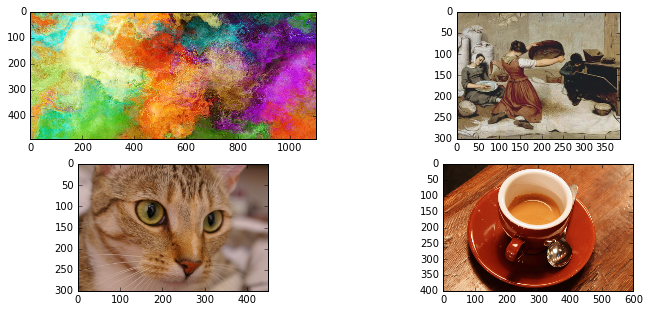

In [20]:
fig = plt.figure(figsize=(12,5))
plt.subplot(221)
plt.imshow(abstract)
plt.subplot(222)
plt.imshow(realism)
plt.subplot(223)
plt.imshow(cat)
plt.subplot(224)
plt.imshow(coffee)

The method is taken from the following link.
http://www.pyimagesearch.com/2015/09/07/blur-detection-with-opencv/

- We are using the Laplacian of an image to calculate the 2nd derivative. We then take the variance of that matrix. This will be a floating point number representing the blurriness of the image.

In [14]:
cv2.Laplacian(abstract, cv2.CV_64F).var()

2571.1714681260937

In [15]:
cv2.Laplacian(realism, cv2.CV_64F).var()

881.91589506013725

In [21]:
cv2.Laplacian(cat, cv2.CV_64F).var()

409.09049996689618

In [22]:
cv2.Laplacian(coffee, cv2.CV_64F).var()

1607.7906639924977

## Detect Symmetry

In [8]:
abstract1 = abstract[:,:len(abstract[0])/2]
abstract2 = abstract[:,len(abstract[0])/2:]

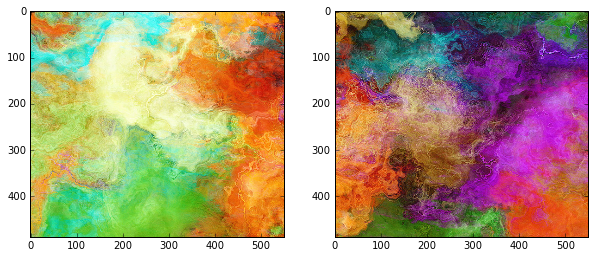

In [44]:
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(abstract1)
plt.subplot(122)
plt.imshow(abstract2)

In [45]:
abstract1.shape

(489, 550, 3)

In [46]:
abstract2.shape

(489, 550, 3)

In [48]:
sub = abstract1 - abstract2

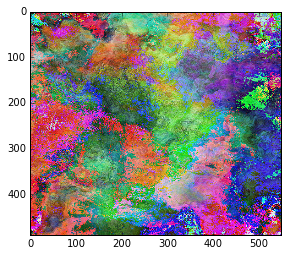

In [49]:
plt.imshow(sub)

In [23]:
gray1 = color.rgb2gray(abstract1)
gray2 = color.rgb2gray(abstract2)
sub = gray1 - gray2

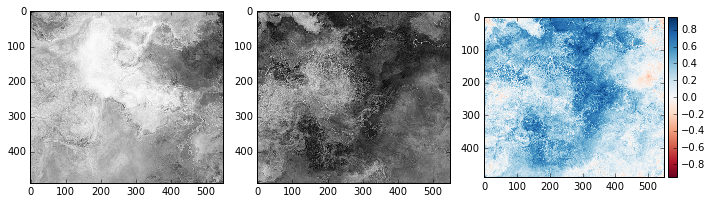

In [24]:
fig = plt.figure(figsize=(10,5))
plt.subplot(131)
io.imshow(gray1)
plt.subplot(132)
io.imshow(gray2)
plt.subplot(133)
io.imshow(sub)

In [35]:
diff = gray1 - np.fliplr(gray2)

In [64]:
def extract_symmetry(image):
    if len(image.shape) == 3:
        height, width, channels = image.shape
    else:
        height, width = image.shape
    pixels = height * width
    left = image[:,:width/2]
    right = image[:,width/2:]
    left_gray = color.rgb2gray(left)
    right_gray = color.rgb2gray(right)
    return np.abs(left_gray - np.fliplr(right_gray)).sum()/(pixels/2)

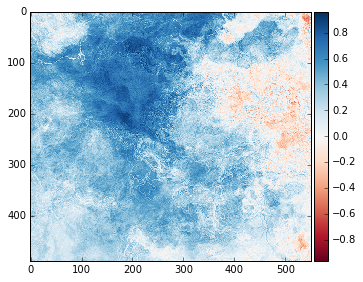

In [45]:
io.imshow(diff)

In [46]:
abstract.shape

(489, 1100, 3)

In [67]:
extract_symmetry(coffee)

0.1903775523235294

In [66]:
extract_symmetry(abstract)

0.35114653756474895

In [49]:
white = np.zeros(shape=(10,10))

In [51]:
black = np.ones(shape=(10,10))

In [55]:
binary_image = np.concatenate((white, black), axis=1)

In [65]:
extract_symmetry(binary_image)

1.0